<a href="https://colab.research.google.com/github/Collinsbrown7723/40-days-of-python/blob/main/isfashion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: connect my drive

from google.colab import drive
drive.mount('/content/drive')

url = "drive/MyDrive/datasets/isfashion/"




Mounted at /content/drive


In [1]:
import os
import cv2
import numpy as np
from PIL import Image
import pandas as pd

url = "drive/MyDrive/datasets/isfashion/"

images = []
labels = []

# Iterate through the "notfashion" folder
not_fashion_folder = os.path.join(url, "not-fashion")
for filename in os.listdir(not_fashion_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png','svg')):  # Add other image extensions if needed
        img_path = os.path.join(not_fashion_folder, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB
            if img is not None: # Check if image loaded correctly
                img = cv2.resize(img, (35, 35)) # Resize images for consistency
                images.append(img)
                labels.append(0)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")

# Iterate through the "fashion" folder
fashion_folder = os.path.join(url, "fashion")
for filename in os.listdir(fashion_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png','svg')): # Add other image extensions if needed
        img_path = os.path.join(fashion_folder, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB
            if img is not None: # Check if image loaded correctly
                img = cv2.resize(img, (35, 35)) # Resize images for consistency
                images.append(img)
                labels.append(1)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")

# Create a Pandas DataFrame
df = pd.DataFrame({'image': images, 'label': labels})


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   524 non-null    object
 1   label   524 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.3+ KB


In [2]:
df.image = df.image/255

In [3]:
# prompt: evaluate

from sklearn.model_selection import train_test_split


# Convert image data to NumPy array
X = np.array(df.image.to_list())
y = np.array(df.label.to_list())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential(
    [
        keras.Input(shape=(35, 35, 3)),  # Input shape: (height, width, channels)
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid"), # Output layer with sigmoid for binary classification
    ]
)


In [5]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [6]:
model.fit(X_train, y_train, epochs=10, batch_size=32) # Adjust epochs and batch_size as needed

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6027 - loss: 0.6346
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.7316 - loss: 0.5140
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.7940 - loss: 0.4296
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.8622 - loss: 0.3702
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8486 - loss: 0.3355
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8434 - loss: 0.3349
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9079 - loss: 0.2778
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9005 - loss: 0.2479
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9215 - loss: 0.2138
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9241 - loss: 0.2147


In [7]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.2615
Test Accuracy: 0.8857


In [8]:
# prompt: print classifation report

from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int) # Convert probabilities to class labels

print(classification_report(y_test, y_pred_classes))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
              precision    recall  f1-score   support

           0       0.96      0.71      0.82        38
           1       0.86      0.99      0.92        67

    accuracy                           0.89       105
   macro avg       0.91      0.85      0.87       105
weighted avg       0.90      0.89      0.88       105



In [9]:
import requests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def predict_from_url(image_url):
    try:
        response = requests.get(image_url, stream=True)
        response.raise_for_status()  # Raise an exception for bad status codes

        image = Image.open(response.raw)
        image = image.resize((35, 35))  # Resize the image to match the model's input shape
        image = np.array(image) / 255.0  # Normalize pixel values
        plt.imshow(image)
        plt.show()
    except Exception as e:
        print(f"Error loading image from URL: {e}")

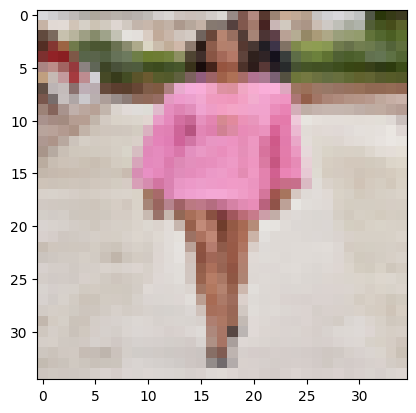

In [10]:
predict_from_url("https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse2.explicit.bing.net%2Fth%3Fid%3DOIP.9-knkmPW7wuvKJ99rW_DGwHaLH%26pid%3DApi&f=1&ipt=d38bcc5d281e85974a55aa463048e87d9ce33564768dbf039e628db08d9e149b&ipo=images")